In [9]:
# importing libraries

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.text import Text
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [10]:
# importing dataset

df = pd.read_csv("C:/ads/DataGlacier/archive (1)/train_E6oV3lV.csv")
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [11]:
# Data Information

In [12]:
# total number of observations and features
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [13]:
# features that exists in this data
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [14]:
# type of data in the dataset
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [15]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [16]:
# size of the data
df.size

95886

In [17]:
# Predictor Attribute
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


In [18]:
# target Attribute
label = df.iloc[:, 0:1]
label.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [19]:
# checking the missing values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [20]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


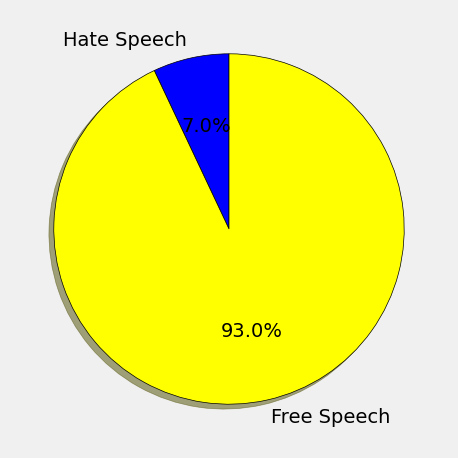

In [21]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]
plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['blue', 'yellow'])
plt.tight_layout()
plt.show()

In [22]:
# Data Preprocessing

In [23]:
# Text Cleaning: Lower Case
def lower_case(text):
    return text.lower()
df['tweet'] = df['tweet'].apply(lower_case)

In [24]:
# Text Cleaning: Removing Punctuation
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))
df['tweet'] = df['tweet'].apply(remove_punct)

In [25]:
# Text Cleaning: Removing URLs
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))
df['tweet'] = df['tweet'].apply(remove_punct)

In [26]:
# Text Cleaning: Removing Tags
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext
df['tweet'] = df['tweet'].apply(remove_tag)

In [27]:
# Text Cleaning: Removing Special Characters
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())
df['tweet'] = df['tweet'].apply(remove_special)

In [28]:
from sklearn.utils import resample

# Separate majority and minority classes
free_speech = df[df['label'] == 0]
hate_speech = df[df['label'] == 1]

# Oversample minority class
hate_speech_oversampled = resample(hate_speech,
                                   replace=True, # sample with replacement
                                   n_samples=len(free_speech), # match number of majority class
                                   random_state=42) # reproducible results

# Combine majority class with oversampled minority class
balanced_data = pd.concat([free_speech, hate_speech_oversampled])

# Display new class counts
print(balanced_data['label'].value_counts())


label
0    29720
1    29720
Name: count, dtype: int64


In [29]:
balanced_data


,id,label,tweet
0,1,0,user when a father is dysfunctional and is so ...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in
4,5,0,factsguide society now motivation
...,...,...,...
24150,24151,1,msnbc cnn amjoy joe biden i want to thank trum...
11115,11116,1,user indianapolis colts black cheerleader hugs...
3417,3418,1,user you might be a libtard if libtard sjw lib...
12300,12301,1,black trump suppoer smacks down cnn repoer for...


In [30]:
# tokenizing
from nltk.tokenize import sent_tokenize, word_tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text
balanced_data['tweet'] = balanced_data['tweet'].apply(tokenize)

In [31]:
# removing stopwords
from nltk.corpus import stopwords
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text
balanced_data['tweet'] = balanced_data['tweet'].apply(remove_stop)

In [32]:
balanced_data

,id,label,tweet
0,1,0,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time]"
4,5,0,"[factsguide, society, motivation]"
...,...,...,...
24150,24151,1,"[msnbc, cnn, amjoy, joe, biden, want, thank, t..."
11115,11116,1,"[user, indianapolis, colts, black, cheerleader..."
3417,3418,1,"[user, might, libtard, libtard, sjw, liberal, ..."
12300,12301,1,"[black, trump, suppoer, smacks, cnn, repoer, r..."


In [33]:
# lemmatization
from nltk.stem import WordNetLemmatizer
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text1 = [word_lem.lemmatize(token) for token in text]
    return text1
balanced_data['tweet'] = balanced_data['tweet'].apply(Lemmatize)

In [34]:
balanced_data

,id,label,tweet
0,1,0,"[user, father, dysfunctional, selfish, drag, k..."
1,2,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time]"
4,5,0,"[factsguide, society, motivation]"
...,...,...,...
24150,24151,1,"[msnbc, cnn, amjoy, joe, biden, want, thank, t..."
11115,11116,1,"[user, indianapolis, colt, black, cheerleader,..."
3417,3418,1,"[user, might, libtard, libtard, sjw, liberal, ..."
12300,12301,1,"[black, trump, suppoer, smack, cnn, repoer, ra..."


In [35]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get part of speech for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Preprocessing function to lemmatize tokens
def lemmatize_tokens(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return lemmatized_tokens

# Assuming balanced_data is your DataFrame with 'tweet' and 'label' columns
# Here, we assume that the 'tweet' column contains tokenized text (i.e., lists of tokens)

# Apply the lemmatize_tokens function to each tokenized tweet
balanced_data['tweet'] = balanced_data['tweet'].apply(lemmatize_tokens)

# If you need to convert lists back to strings for easier viewing
balanced_data['tweet'] = balanced_data['tweet'].apply(lambda x: ' '.join(x))



In [60]:
balanced_data.iloc[0]


id                                                       1
label                                                    0
tweet    user father dysfunctional selfish drag kid dys...
Name: 0, dtype: object

In [38]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd

from transformers import TrainingArguments, Trainer




In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_data['tweet'],balanced_data['label'],test_size=0.2)

In [40]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
model = model.to('cuda')

In [42]:
X = list(balanced_data["tweet"])
y = list(balanced_data["label"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [43]:
X_train_tokenized['input_ids']

[[101,
  5541,
  2154,
  8038,
  3363,
  3342,
  2868,
  4606,
  5958,
  4923,
  5003,
  2050,
  14614,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  3201,
  24264,
  2213,
  3893,
  21358,
  27972,
  3370,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  2166,
  3376,
  3117,
  1057,
  3191,
  2203,
  3752,
  6517,
  2240,
  2919,
  3931,
  2987,
  2102,
  2812,
  2045,
  2203,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  17246,
  3379,
  3158,
  9305,
  5562,
  10112,
  1059,
  6499,
  28887,
  2015,
  2552,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [44]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [45]:
len(X_train),len(X_val)


(47552, 11888)

In [46]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [47]:
train_dataset[0]



{'input_ids': tensor([  101,  5541,  2154,  8038,  3363,  3342,  2868,  4606,  5958,  4923,
          5003,  2050, 14614,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor(0)}

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [49]:
import accelerate
print(accelerate.__version__)


0.33.0


In [50]:
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=5,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [52]:
trainer.train()

  0%|          | 0/5944 [00:00<?, ?it/s]

{'loss': 0.3435, 'grad_norm': 7.11039400100708, 'learning_rate': 4.579407806191117e-05, 'epoch': 0.08}
{'loss': 0.2874, 'grad_norm': 0.14548780024051666, 'learning_rate': 4.158815612382234e-05, 'epoch': 0.17}
{'loss': 0.243, 'grad_norm': 4.560582160949707, 'learning_rate': 3.738223418573352e-05, 'epoch': 0.25}
{'loss': 0.2121, 'grad_norm': 0.11907246708869934, 'learning_rate': 3.317631224764469e-05, 'epoch': 0.34}
{'loss': 0.1791, 'grad_norm': 0.37108731269836426, 'learning_rate': 2.8970390309555857e-05, 'epoch': 0.42}
{'loss': 0.1324, 'grad_norm': 0.0883110761642456, 'learning_rate': 2.4764468371467026e-05, 'epoch': 0.5}
{'loss': 0.102, 'grad_norm': 14.638920783996582, 'learning_rate': 2.05585464333782e-05, 'epoch': 0.59}
{'loss': 0.1003, 'grad_norm': 3.9226231575012207, 'learning_rate': 1.635262449528937e-05, 'epoch': 0.67}
{'loss': 0.0902, 'grad_norm': 0.024547088891267776, 'learning_rate': 1.2146702557200538e-05, 'epoch': 0.76}
{'loss': 0.0856, 'grad_norm': 0.05060966685414314, 'le

TrainOutput(global_step=5944, training_loss=0.1580653395980075, metrics={'train_runtime': 844.8293, 'train_samples_per_second': 56.286, 'train_steps_per_second': 7.036, 'total_flos': 1048431777845760.0, 'train_loss': 0.1580653395980075, 'epoch': 1.0})

In [53]:
trainer.evaluate()

  0%|          | 0/1486 [00:00<?, ?it/s]

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.03822261467576027,
 'eval_accuracy': 0.992849932705249,
 'eval_precision': 0.9859014761983745,
 'eval_recall': 1.0,
 'eval_f1': 0.9929006932264262,
 'eval_runtime': 34.016,
 'eval_samples_per_second': 349.483,
 'eval_steps_per_second': 43.685,
 'epoch': 1.0}

In [54]:
np.set_printoptions(suppress=True)


In [83]:
text = " sex videos sexy lady fucked hard pics"
# text = "go to hell"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.5800, -3.4611]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[0.9976, 0.0024]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


array([[0.9976267 , 0.00237324]], dtype=float32)